In [1]:
import re
import datetime
from glob import glob 
import seaborn as sns 
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rcParams['agg.path.chunksize'] = 10000
import seaborn as sns 
from method import * 

file_paths = glob('/Volume/VAD/LifeLongerAD_cu121/results/ReverseDistillation/MVTecAD/drift_grad_norm-*/seed_42/DriftMonitor.log/DriftMonitor.log')

results = {fp.split('/')[-6]+'-' + fp.split('/')[-4] : parse_log_file(fp) for fp in file_paths}

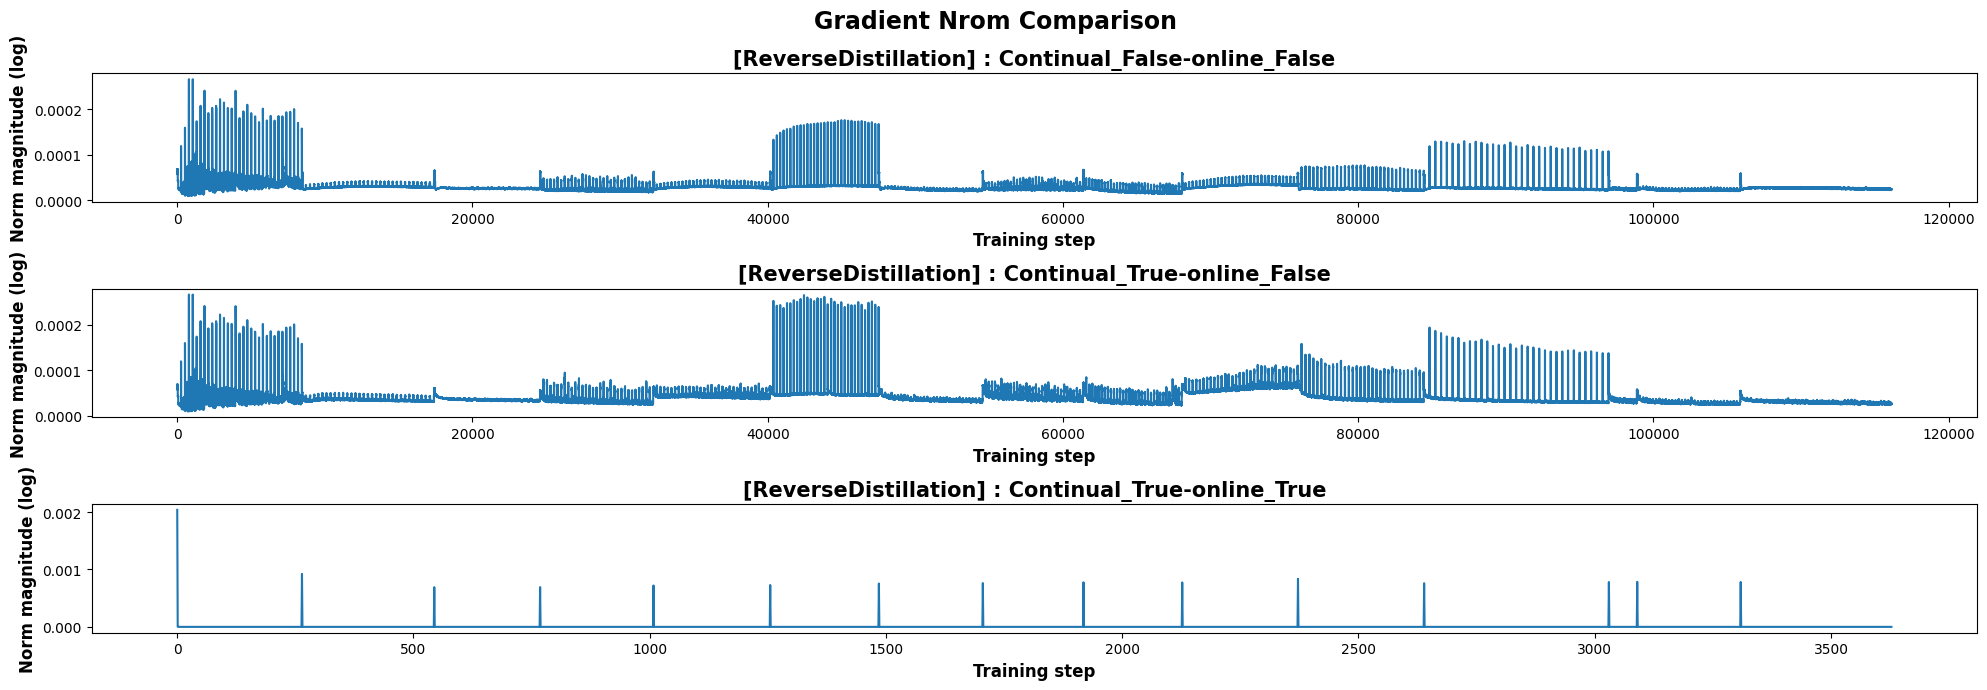

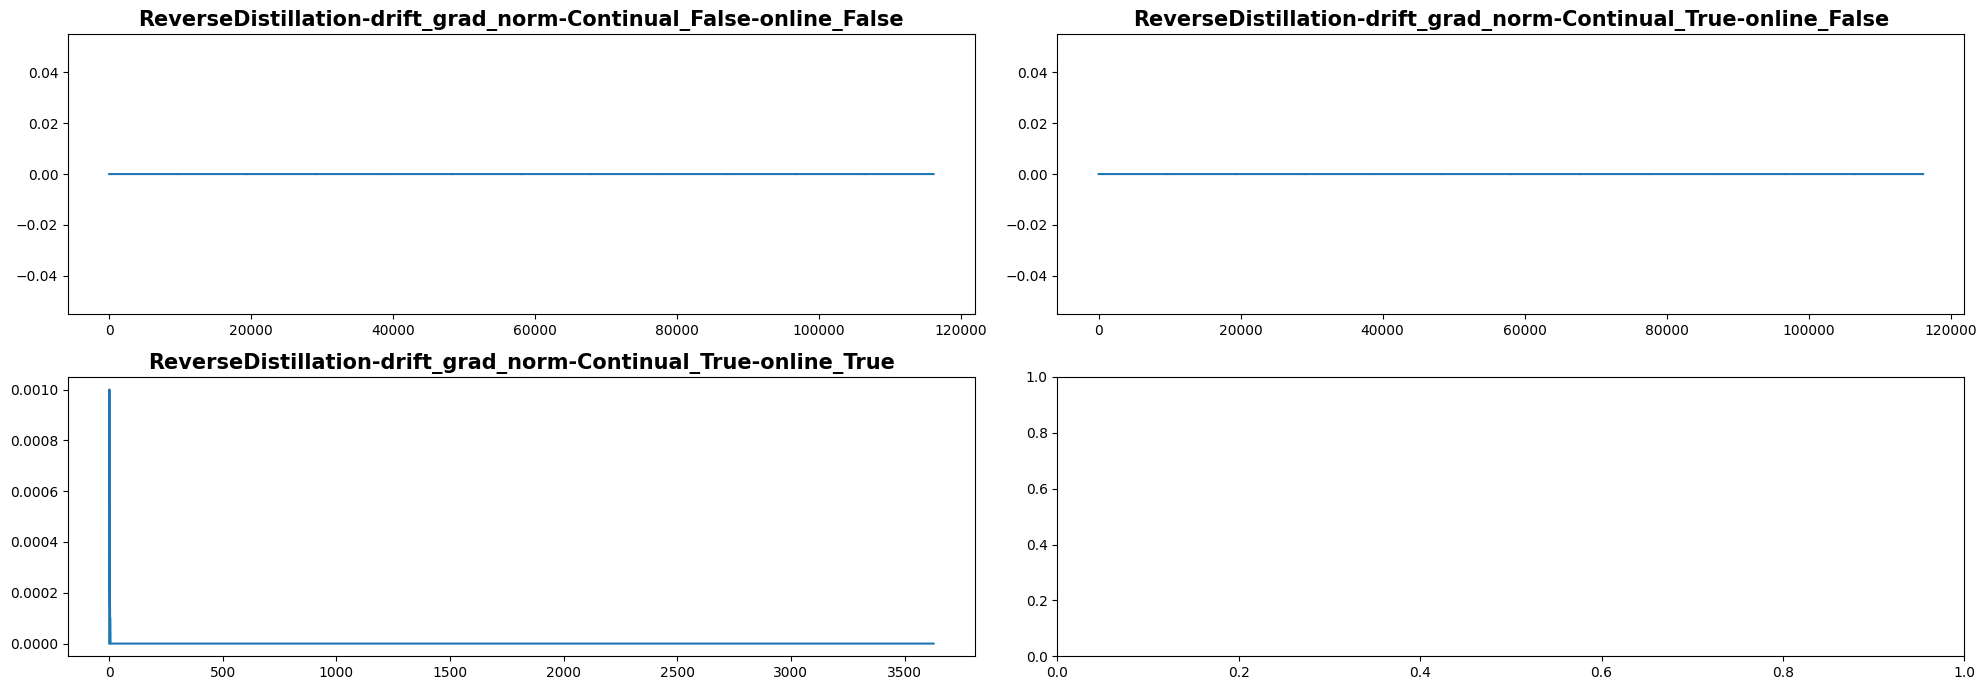

In [6]:
# method = ['ConvAutoencoder','ReverseDistillation','IUF','FastFlow']
method = ['ReverseDistillation']
exp = ['Continual_False-online_False','Continual_True-online_False','Continual_True-online_True']
# exp = ['Continual_False-online_False','Continual_True-online_False']

fig, axes = plt.subplots(3,1, figsize=(20, 7))
axes = axes.flatten() 
i = 0 
for e in exp: 
    for m in method:    
        key = f"{m}-drift_grad_norm-{e}"
        data = results[key]
        
        sns.lineplot(data=data[0], ax=axes[i])
        axes[i].set_title(f"[{m}] : {e}",fontsize=15,weight='bold')
        # axes[i].set_yscale("log")
        axes[i].set_ylabel('Norm magnitude (log)',weight='bold', fontsize=12)
        axes[i].set_xlabel('Training step',weight='bold', fontsize=12)
                        
        i+=1
        
fig.suptitle('Gradient Nrom Comparison',fontsize=17,weight='bold')
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(2, 2, figsize=(20, 7))
axes = axes.flatten() 
i = 0 
for e in exp: 
    for m in method:
        key = f"{m}-drift_grad_norm-{e}"
        data = results[key]

        sns.lineplot(data=data[2], ax=axes[i])
        axes[i].set_title(key,fontsize=15,weight='bold')
        # axes[i].set_yscale("log")
        
        
        
        
        
        i+=1
plt.tight_layout()
plt.show()

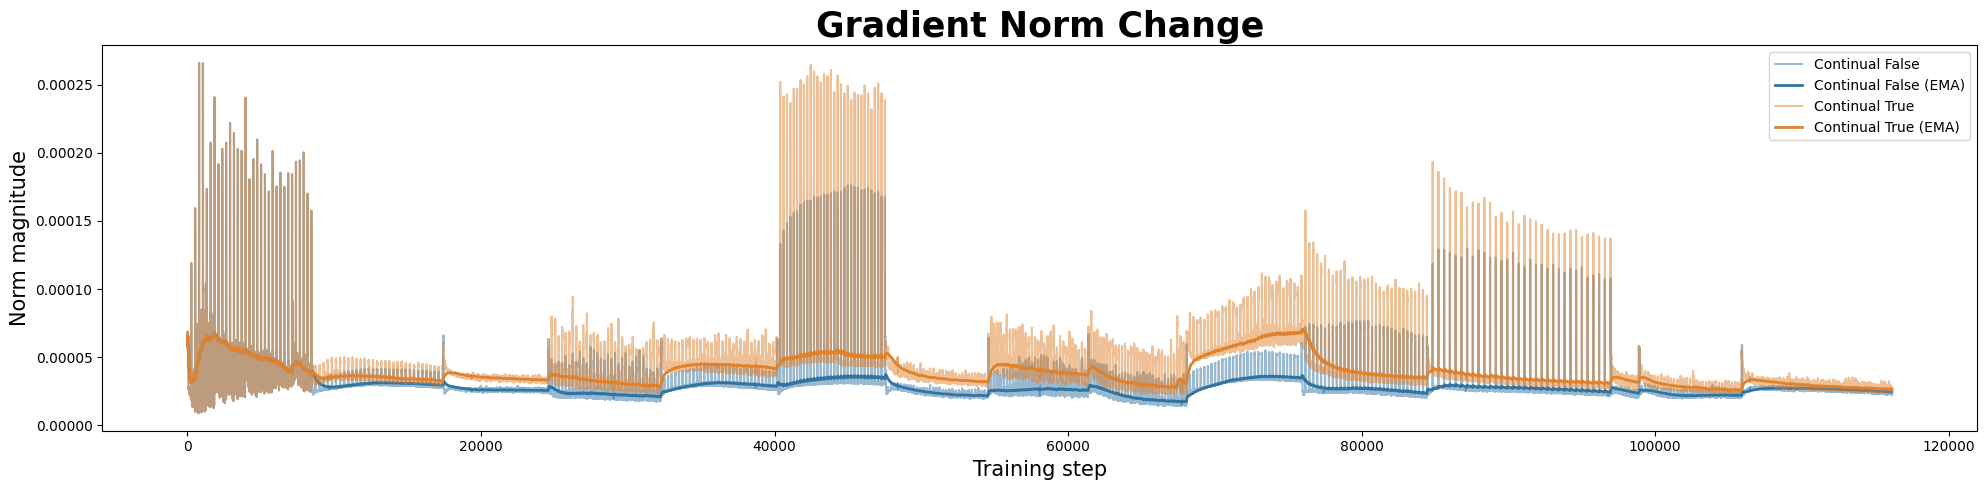

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# method = ['ConvAutoencoder','ReverseDistillation','IUF','FastFlow']
method = ['ReverseDistillation']
exp = ['Continual_False-online_False', 'Continual_True-online_False']

# 추출된 색상 적용
color_map = {
    'Continual_False': '#3274A1',  # 파란색 (RGB: 50, 116, 161)
    'Continual_True': '#E1812C'   # 주황색 (RGB: 225, 129, 44)
}

fig, axes = plt.subplots(1, 1, figsize=(20, 5))

ema_half_life = 1000  # EMA의 반감기 (조정 가능)

for e in exp: 
    for m in method:    
        key = f"{m}-drift_grad_norm-{e}"
        data = results[key]
        
        # 색상 지정
        continual_status = e.split('-')[0]  # 'Continual_False' 또는 'Continual_True'
        color = color_map.get(continual_status, 'gray')  # 예외 발생 시 기본값 회색

        # 원본 데이터 시각화
        sns.lineplot(data=data[0], ax=axes, label=f"{continual_status.replace('_', ' ')}", 
                     alpha=0.5, color=color)
        
        # EMA 적용 데이터 시각화
        ema_data = pd.Series(data[0]).ewm(span=ema_half_life).mean()
        sns.lineplot(data=ema_data, ax=axes, label=f"{continual_status.replace('_', ' ')} (EMA)", 
                     linewidth=2, color=color)

        axes.set_ylabel('Norm magnitude', fontsize=15)
        axes.set_xlabel('Training step', fontsize=15)

axes.set_title("Gradient Norm Change", fontsize=25, weight='bold')
plt.tight_layout()
plt.show()
